<a href="https://colab.research.google.com/github/aimlbits16/Project/blob/master/CapstoneProject_ML_Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! apt-get install default-jre
! java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [3]:
! pip install h2o

     |████████████████████████████████| 129.6MB 46kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=ab87d570c9e3128ff43c9b923e2d8498d28631451a4c0d10cbdab663bf8df5a9
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [4]:
! pip install catboost

     |████████████████████████████████| 64.8MB 45kB/s 


In [0]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
#import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score, make_scorer, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, f1_score

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from collections import Counter
import numpy as np

import lightgbm
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from itertools import product, chain
from tqdm import tqdm

import h2o as h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator

from catboost import CatBoostClassifier
from catboost.utils import get_confusion_matrix
from catboost import Pool

#Single model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Ensemble classifications models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import time
from sklearn.pipeline import Pipeline


In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
InputFolder = '/content/gdrive/My Drive/capstone-project/input_data'
OutFolder = '/content/gdrive/My Drive/capstone-project/output_data'
inFile = InputFolder + '/ZCUPClaimDNA-History-Data-v2.xlsx'
pklFile = OutFolder + '/df_data.pkl'

In [0]:
df_data = pd.read_pickle(pklFile)
pklFile = OutFolder + '/df_data.pkl'

In [10]:
print(df_data.head())

   Claim.Charge.Amount In.Out.Of.Network  ...  Procedure.Code.Group Label
0         19356.960000                 0  ...                     5     0
1             0.000000                 0  ...                     5     0
3          2262.097800                 0  ...                     5     0
4           284.712735                 0  ...                     5     0
6            38.146050                 0  ...                     5     0

[5 rows x 11 columns]


In [15]:
y = df_data['Label']  
X = df_data.drop(["Label"], axis = 1)


print(X.columns)
print(X.isnull().sum())

MinMax_scale = MinMaxScaler()
X_scaled = MinMax_scale.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, stratify=y,random_state = 88)


Index(['Claim.Charge.Amount', 'In.Out.Of.Network', 'Provider.Payment.Amount',
       'Claim.Type', 'Claim.Subscriber.Type', 'Claim.Current.Status',
       'Revenue.Code.Group', 'Service.Code.Group', 'Diagnosis.Code.Group',
       'Procedure.Code.Group'],
      dtype='object')
Claim.Charge.Amount        0
In.Out.Of.Network          0
Provider.Payment.Amount    0
Claim.Type                 0
Claim.Subscriber.Type      0
Claim.Current.Status       0
Revenue.Code.Group         0
Service.Code.Group         0
Diagnosis.Code.Group       0
Procedure.Code.Group       0
dtype: int64


In [16]:
std_scale = StandardScaler()
#X_train_scaled = std_scale.fit_transform(Xtrain)
#X_test_scaled = std_scale.transform(Xtest)

print("Done Scaling")

Done Scaling


In [0]:
# Doing Random Over Sampling

In [17]:
ros = RandomOverSampler(random_state=88)
X_resampled_1, y_resampled_1 = ros.fit_sample(X, y)

yvals, counts = np.unique(ytest, return_counts=True)

yvals_ros, counts_ros = np.unique(y_resampled_1, return_counts=True)

print('Classes in test set:',dict(zip(yvals, counts)),'\n',
      'Classes in rebalanced train set:',dict(zip(yvals_ros, counts_ros)))

Xtrain_ros, Xtest_ros, ytrain_ros, ytest_ros = train_test_split(X_resampled_1, y_resampled_1, test_size=0.2,random_state = 88)
std_scale = StandardScaler()
X_train_scaled_ros = std_scale.fit_transform(Xtrain_ros)
X_test_scaled_ros = std_scale.transform(Xtest_ros)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classes in test set: {0: 30382, 1: 394} 
 Classes in rebalanced train set: {0: 151905, 1: 151905}


In [18]:
X.columns

Index(['Claim.Charge.Amount', 'In.Out.Of.Network', 'Provider.Payment.Amount',
       'Claim.Type', 'Claim.Subscriber.Type', 'Claim.Current.Status',
       'Revenue.Code.Group', 'Service.Code.Group', 'Diagnosis.Code.Group',
       'Procedure.Code.Group'],
      dtype='object')

In [0]:
# Doing SMOTE

In [0]:
sm = SMOTENC(random_state=42, categorical_features=[1,3,4,5,6,7,8,9])

X_smot,y_smot = sm.fit_resample(X,y.ravel())
print('Original dataset samples per class {}'.format(Counter(y)))
print('Resampled dataset samples per class {}'.format(Counter(y_smot)))

Xtrain_smot, Xtest_smot, ytrain_smot, ytest_smot = train_test_split(X_smot, y_smot, test_size=0.2,random_state = 88)

std_scale = StandardScaler()
X_train_scaled_smot = std_scale.fit_transform(Xtrain_smot)
X_test_scaled_smot = std_scale.transform(Xtest_smot)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[59275     0]
 [  394     0]]
Predicted      0    All
Actual                 
0          59275  59275
1            394    394
All        59669  59669


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59275
           1       0.00      0.00      0.00       394

    accuracy                           0.99     59669
   macro avg       0.50      0.50      0.50     59669
weighted avg       0.99      0.99      0.99     59669

Model Accuracy: 0.9933969062662354
0.9417967744767035


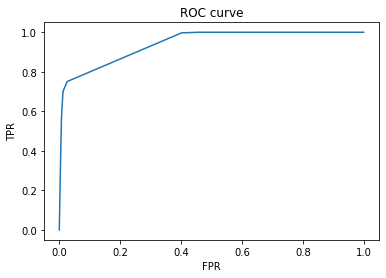

In [0]:
# decision Tree Without ROS and SMOTE
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(X_train_scaled, ytrain)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(ytest,y_pred)
print(cm)
print (pd.crosstab(ytest, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('Classification Report\n',classification_report(ytest,y_pred))
print ('Model Accuracy:',accuracy_score(ytest,y_pred))
predictions = model.predict_proba(X_test_scaled)
print(roc_auc_score(ytest, predictions[:,1]))
fpr, tpr, _ = roc_curve(ytest, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

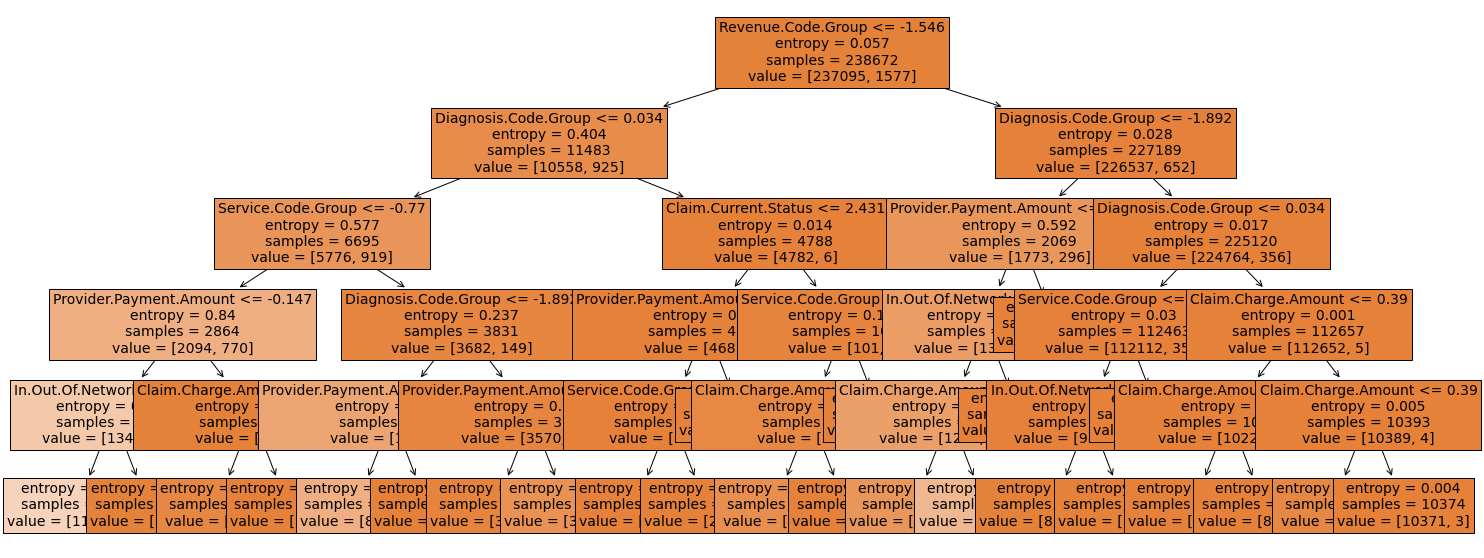

In [0]:
plt.figure(figsize=(25,10))
a = plot_tree(model, filled=True, feature_names=X.columns,  fontsize=14)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


precision, recall, F-measure and support =  (0.9930606380761089, 0.9936818113258141, 0.9933319144601158, None)
Accuracy: 0.9936818113258141
Precision: 0.526984126984127
Recall: 0.4213197969543147
f1_score =  0.46826516220028214
Confusion Matrix [[59126   149]
 [  228   166]]
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59275
           1       0.53      0.42      0.47       394

    accuracy                           0.99     59669
   macro avg       0.76      0.71      0.73     59669
weighted avg       0.99      0.99      0.99     59669

0.8722238469492836


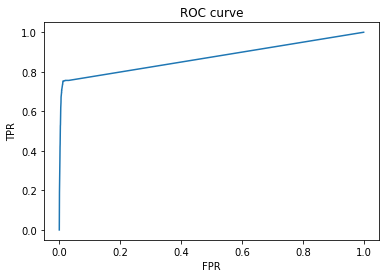

In [0]:
# Random forest without SMOTE and ROS

paramgrid={'max_depth': [3, None],'n_estimators': (5,10),'max_features': (5,10)}
gs = GridSearchCV(estimator=RandomForestClassifier(),iid = True, param_grid = paramgrid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
classifier = gs.fit(X_train_scaled,ytrain)
y_pred = classifier.predict(X_test_scaled)

print('precision, recall, F-measure and support = ', precision_recall_fscore_support(ytest, y_pred, average='weighted'))
print("Accuracy:",accuracy_score(ytest, y_pred))
print("Precision:",precision_score(ytest, y_pred))
print("Recall:",recall_score(ytest, y_pred))
print('f1_score = ',f1_score(ytest, y_pred))
print('Confusion Matrix',confusion_matrix(ytest, y_pred))
print('Classification report: \n\n', classification_report(ytest, y_pred))

predictions = classifier.predict_proba(X_test_scaled)

print(roc_auc_score(ytest, predictions[:,1]))

fpr, tpr, _ = roc_curve(ytest, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
# With smote

Predicted       0     All
Actual                   
0           59120   59120
1           59428   59428
All        118548  118548


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     59120
           1       0.00      0.00      0.00     59428

    accuracy                           0.50    118548
   macro avg       0.25      0.50      0.33    118548
weighted avg       0.25      0.50      0.33    118548

Model Accuracy: 0.4987009481391504
0.9476150654109092


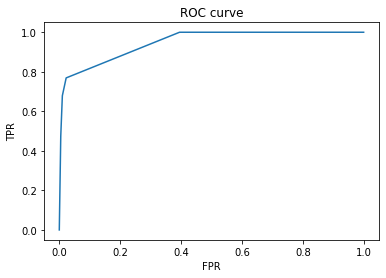

In [0]:
# decision Tree With SMOTE
model_smot = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_smot.fit(X_train_scaled_smot, ytrain_smot)
y_pred_smot = model.predict(X_test_scaled_smot)
cm_smot = confusion_matrix(ytest_smot,y_pred_smot)
print (pd.crosstab(ytest_smot, y_pred_smot, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('Classification Report\n',classification_report(ytest_smot,y_pred_smot))
print ('Model Accuracy:',accuracy_score(ytest_smot,y_pred_smot))
predictions = model_smot.predict_proba(X_test_scaled_smot)
print(roc_auc_score(ytest_smot, predictions[:,1]))
fpr, tpr, _ = roc_curve(ytest_smot, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

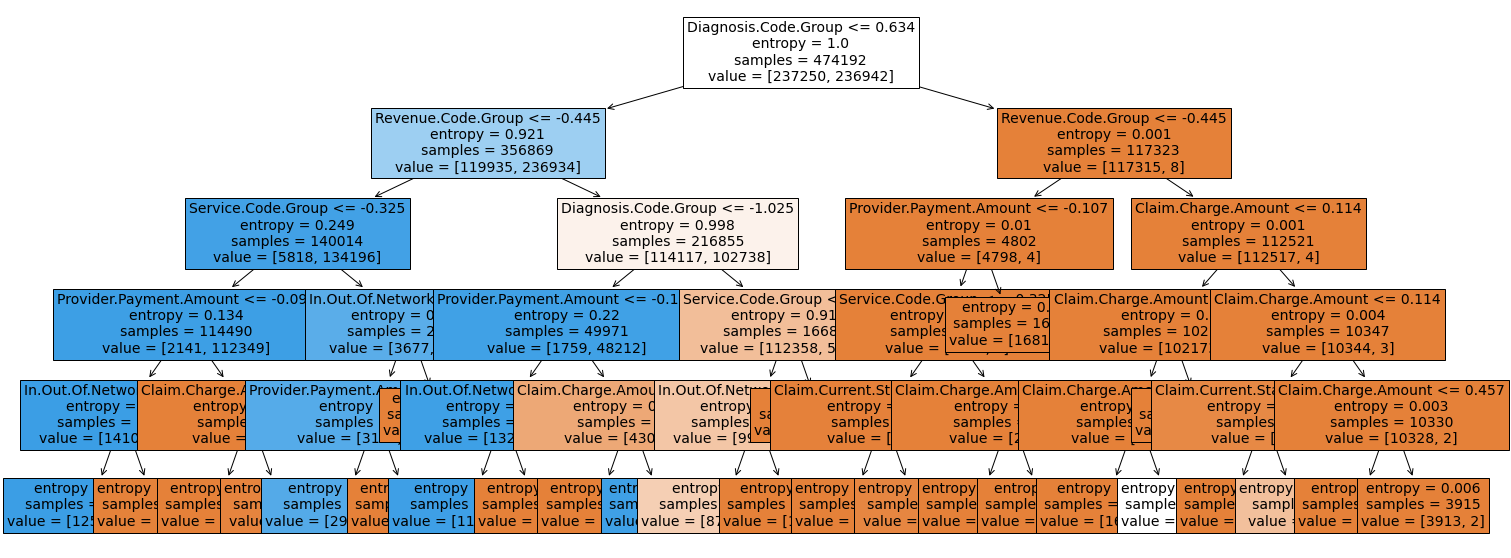

In [0]:
plt.figure(figsize=(25,10))
a = plot_tree(model_smot, filled=True, feature_names=X.columns,  fontsize=14)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


precision, recall, F-measure and support =  (0.9712664639889655, 0.9712521510274319, 0.9712521418059481, None)
Accuracy: 0.9712521510274319
Precision: 0.9738943592867052
Recall: 0.968617486706603
f1_score =  0.9712487556312956
Confusion Matrix [[57577  1543]
 [ 1865 57563]]
Classification report: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97     59120
           1       0.97      0.97      0.97     59428

    accuracy                           0.97    118548
   macro avg       0.97      0.97      0.97    118548
weighted avg       0.97      0.97      0.97    118548

0.9856377079215175


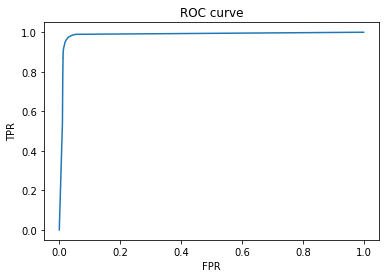

In [0]:
# Random forest with SMOT

paramgrid={'max_depth': [3, None],'n_estimators': (5,10),'max_features': (5,10)}
gs_smot = GridSearchCV(estimator=RandomForestClassifier(),iid = True, param_grid = paramgrid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
classifier_smot = gs_smot.fit(X_train_scaled_smot,ytrain_smot)
y_pred_smot = classifier_smot.predict(X_test_scaled_smot)

print('precision, recall, F-measure and support = ', precision_recall_fscore_support(ytest_smot, y_pred_smot, average='weighted'))
print("Accuracy:",accuracy_score(ytest_smot, y_pred_smot))
print("Precision:",precision_score(ytest_smot, y_pred_smot))
print("Recall:",recall_score(ytest_smot, y_pred_smot))
print('f1_score = ',f1_score(ytest_smot, y_pred_smot))
print('Confusion Matrix',confusion_matrix(ytest_smot, y_pred_smot))
print('Classification report: \n\n', classification_report(ytest_smot, y_pred_smot))

predictions = classifier_smot.predict_proba(X_test_scaled_smot)

print(roc_auc_score(ytest_smot, predictions[:,1]))

fpr, tpr, _ = roc_curve(ytest_smot, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
# with ros

[[57545  1575]
 [13572 45856]]
Predicted      0      1     All
Actual                         
0          57545   1575   59120
1          13572  45856   59428
All        71117  47431  118548
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     59120
           1       0.97      0.77      0.86     59428

    accuracy                           0.87    118548
   macro avg       0.89      0.87      0.87    118548
weighted avg       0.89      0.87      0.87    118548

Model Accuracy: 0.8722289705435773
0.9467628309140736


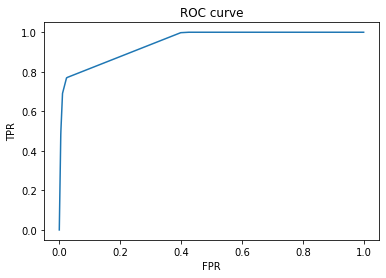

In [0]:
# decision Tree With ROS
model_ros = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_ros.fit(X_train_scaled_ros, ytrain_ros)
y_pred_ros = model_ros.predict(X_test_scaled_ros)
cm_ros = confusion_matrix(ytest_ros,y_pred_ros)
print(cm_ros)
print (pd.crosstab(ytest_ros, y_pred_ros, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('Classification Report\n',classification_report(ytest_ros,y_pred_ros))
print ('Model Accuracy:',accuracy_score(ytest_ros,y_pred_ros))
predictions = model_ros.predict_proba(X_test_scaled_ros)
print(roc_auc_score(ytest_ros, predictions[:,1]))
fpr, tpr, _ = roc_curve(ytest_ros, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

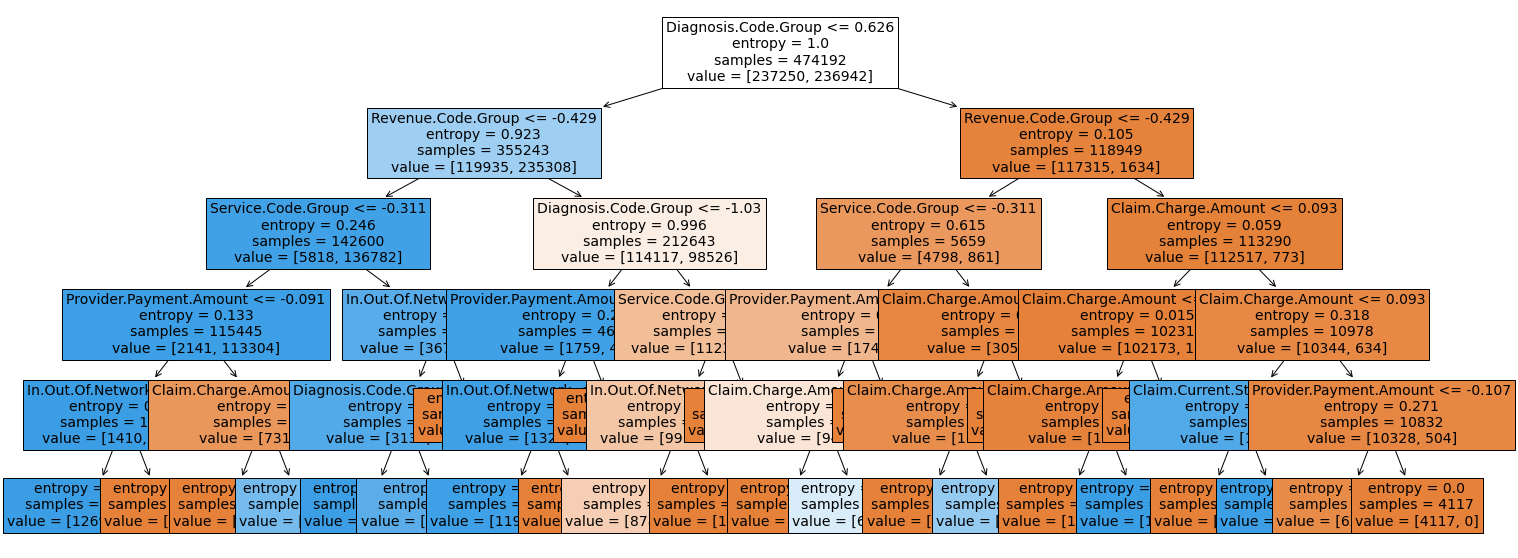

In [0]:
plt.figure(figsize=(25,10))
a = plot_tree(model_ros, filled=True, feature_names=X.columns,  fontsize=14)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


precision, recall, F-measure and support =  (0.9887867055694057, 0.9886543847218004, 0.988653371071131, None)
Accuracy: 0.9886543847218004
Precision: 0.9807797367767569
Recall: 0.9969038163828499
f1_score =  0.988776046664942
Confusion Matrix [[57959  1161]
 [  184 59244]]
Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     59120
           1       0.98      1.00      0.99     59428

    accuracy                           0.99    118548
   macro avg       0.99      0.99      0.99    118548
weighted avg       0.99      0.99      0.99    118548

0.9975824928196848


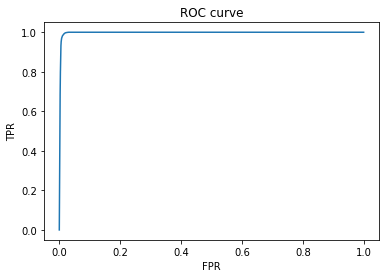

In [0]:
# Random forest with ROS

paramgrid={'max_depth': [3, None],'n_estimators': (5,10),'max_features': (5,10)}
gs = GridSearchCV(estimator=RandomForestClassifier(),iid = True, param_grid = paramgrid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
classifier_ros = gs.fit(X_train_scaled_ros,ytrain_ros)
y_pred_ros = classifier_ros.predict(X_test_scaled_ros)

print('precision, recall, F-measure and support = ', precision_recall_fscore_support(ytest_ros, y_pred_ros, average='weighted'))
print("Accuracy:",accuracy_score(ytest_ros, y_pred_ros))
print("Precision:",precision_score(ytest_ros, y_pred_ros))
print("Recall:",recall_score(ytest_ros, y_pred_ros))
print('f1_score = ',f1_score(ytest_ros, y_pred_ros))
print('Confusion Matrix',confusion_matrix(ytest_ros, y_pred_ros))
print('Classification report: \n\n', classification_report(ytest_ros, y_pred_ros))

predictions = classifier_ros.predict_proba(X_test_scaled_ros)

print(roc_auc_score(ytest_ros, predictions[:,1]))

fpr, tpr, _ = roc_curve(ytest_ros, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
# Implementing CatBoost Classifier

In [0]:
#Trying again
from catboost.utils import get_confusion_matrix
from catboost import Pool
cat_features = [1,4,5,6,7,8,9,10]
catboost = CatBoostClassifier(iterations=500 )
test_dataset=Pool(data=X_test_scaled, label=ytest)
catboost.fit(X_train_scaled, ytrain)
y_pred_cbt = catboost.predict_proba(X_test_scaled)
cm = get_confusion_matrix(catboost, Pool(X_test_scaled, ytest))
print(cm)

Learning rate set to 0.201511
0:	learn: 0.2543470	total: 127ms	remaining: 1m 3s
1:	learn: 0.1096700	total: 208ms	remaining: 51.8s
2:	learn: 0.0663356	total: 288ms	remaining: 47.7s
3:	learn: 0.0405492	total: 397ms	remaining: 49.2s
4:	learn: 0.0304591	total: 483ms	remaining: 47.8s
5:	learn: 0.0263359	total: 571ms	remaining: 47s
6:	learn: 0.0238906	total: 664ms	remaining: 46.8s
7:	learn: 0.0225536	total: 750ms	remaining: 46.2s
8:	learn: 0.0216114	total: 836ms	remaining: 45.6s
9:	learn: 0.0209751	total: 921ms	remaining: 45.1s
10:	learn: 0.0206088	total: 1.01s	remaining: 44.8s
11:	learn: 0.0203317	total: 1.09s	remaining: 44.5s
12:	learn: 0.0201143	total: 1.18s	remaining: 44.2s
13:	learn: 0.0199702	total: 1.26s	remaining: 43.8s
14:	learn: 0.0198153	total: 1.36s	remaining: 43.9s
15:	learn: 0.0196645	total: 1.44s	remaining: 43.7s
16:	learn: 0.0195488	total: 1.53s	remaining: 43.5s
17:	learn: 0.0194071	total: 1.62s	remaining: 43.3s
18:	learn: 0.0193486	total: 1.7s	remaining: 43.1s
19:	learn: 0.0

In [0]:
# XGBoost

In [0]:
model_xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
model_xgb.fit(X_train_scaled, ytrain)
# make predictions for test data
y_pred_xgb = model_xgb.predict(X_test_scaled)
predictions_xgb = [round(value) for value in y_pred_xgb]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('precision, recall, F-measure and support = ', precision_recall_fscore_support(ytest, y_pred_xgb, average='weighted'))
print("Accuracy:",accuracy_score(ytest, y_pred_xgb))
print("Precision:",precision_score(ytest, y_pred_xgb))
print("Recall:",recall_score(ytest, y_pred_xgb))
print('f1_score = ',f1_score(ytest, y_pred_xgb))
print('Confusion Matrix',confusion_matrix(ytest, y_pred_xgb))

print('Classification report: \n\n', classification_report(ytest, y_pred_xgb))


Accuracy: 99.36%
precision, recall, F-measure and support =  (0.9914352424029645, 0.9935644974777522, 0.9908952202577297, None)
Accuracy: 0.9935644974777522
Precision: 0.6388888888888888
Recall: 0.0583756345177665
f1_score =  0.10697674418604651
Confusion Matrix [[59262    13]
 [  371    23]]
Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59275
           1       0.64      0.06      0.11       394

    accuracy                           0.99     59669
   macro avg       0.82      0.53      0.55     59669
weighted avg       0.99      0.99      0.99     59669



In [0]:
# lightGBM

In [0]:
#categorical_features = [c for c, col in enumerate(X.columns) if 'cat' in col]
categorical_features = [1,4,5,6,7,8,9,10]

train_data = lightgbm.Dataset(X_train_scaled, label=ytrain, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(X_test_scaled, label=ytest)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting_type': 'rf',
    'num_leaves': 30,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'sub_feature': 0.5,
    'min_data': 50,
    'max_depth': 10,
    'verbose': 0
}

#parameters = {}
#parameters['sub_feature'] = 0.5


model_gbm = lightgbm.train(parameters,
                           train_data,
                           valid_sets=test_data,
                           num_boost_round=5000,
                           early_stopping_rounds=100)

#Prediction
y_pred_gbm=model_gbm.predict(X_test_scaled)
#convert into binary values
for i in range(len(X_test_scaled)):
    if y_pred_gbm[i]>=.2:       # setting threshold to .5
        y_pred_gbm[i]=1
    else:  
        y_pred_gbm[i]=0


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4, 5, 6, 7, 8, 9, 10]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's auc: 0.908452
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.931284
[3]	valid_0's auc: 0.938968
[4]	valid_0's auc: 0.938481
[5]	valid_0's auc: 0.941234
[6]	valid_0's auc: 0.943365
[7]	valid_0's auc: 0.94121
[8]	valid_0's auc: 0.93771
[9]	valid_0's auc: 0.943452
[10]	valid_0's auc: 0.943422
[11]	valid_0's auc: 0.948757
[12]	valid_0's auc: 0.946299
[13]	valid_0's auc: 0.949133
[14]	valid_0's auc: 0.948096
[15]	valid_0's auc: 0.949932
[16]	valid_0's auc: 0.94978
[17]	valid_0's auc: 0.950538
[18]	valid_0's auc: 0.950912
[19]	valid_0's auc: 0.950919
[20]	valid_0's auc: 0.950918
[21]	valid_0's auc: 0.951149
[22]	valid_0's auc: 0.951399
[23]	valid_0's auc: 0.950749
[24]	valid_0's auc: 0.95099
[25]	valid_0's auc: 0.950473
[26]	valid_0's auc: 0.950669
[27]	valid_0's auc: 0.951277
[28]	valid_0's auc: 0.951362
[29]	valid_0's auc: 0.951286
[30]	valid_0's auc: 0.95151
[31]	valid_0's auc: 0.950875
[32]	valid_0's auc: 0.951333
[33]	valid_0's auc: 0.9

In [0]:
# evaluate predictions
accuracy = accuracy_score(ytest, y_pred_gbm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('precision, recall, F-measure and support = ', precision_recall_fscore_support(ytest, y_pred_gbm, average='weighted'))
print("Accuracy:",accuracy_score(ytest, y_pred_gbm))
print("Precision:",precision_score(ytest, y_pred_gbm))
print("Recall:",recall_score(ytest, y_pred_gbm))
print('f1_score = ',f1_score(ytest, y_pred_gbm))
print('Confusion Matrix',confusion_matrix(ytest, y_pred_gbm))

print('Classification report: \n\n', classification_report(ytest, y_pred_gbm))


Accuracy: 1.63%
precision, recall, F-measure and support =  (0.9934409321056936, 0.016256347517136203, 0.019208172167717013, None)
Accuracy: 0.016256347517136203
Precision: 0.0066674563823126256
Recall: 1.0
f1_score =  0.01324659169230252
Confusion Matrix [[  576 58699]
 [    0   394]]
Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.01      0.02     59275
           1       0.01      1.00      0.01       394

    accuracy                           0.02     59669
   macro avg       0.50      0.50      0.02     59669
weighted avg       0.99      0.02      0.02     59669



In [0]:
# H2O

In [0]:
#h2o.cluster().shutdown()
h2o.init(max_mem_size='1G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1dnguf4r
  JVM stdout: /tmp/tmp1dnguf4r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1dnguf4r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_jjlb07
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
pklFile = OutFolder + '/cp_raw_data.pkl'
df_data_for_h2o = pd.read_pickle(pklFile)

In [0]:
#df = h2o.import_file('C:\\Users\\PARVKUMA\\ZCUPClaimDNA-History-Data-v2.xlsx')
#h2o_df_data = h2o.H2OFrame(df_data_for_h2o)
h2o_df_data = h2o.H2OFrame(df_data)
h2o_df_data.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Claim.Charge.Amount,In.Out.Of.Network,Subscriber.Payment.Amount,Provider.Payment.Amount,Claim.Type,Claim.Subscriber.Type,Claim.Current.Status,Label,Revenue.Code.Group,Service.Code.Group,Diagnosis.Code.Group,Procedure.Code.Group
19357,0,0,15036.2,1,0,2,0,1,1,2,5
0,0,0,0,1,0,91,0,3,2,2,5
27099.7,0,0,27525.3,1,0,91,0,1,1,2,5
2262.1,0,0,0,1,0,91,0,2,2,2,5
284.713,0,0,0,1,0,91,0,2,2,2,5
1081.4,0,0,0,1,0,91,0,2,2,2,5
38.1461,0,0,0,1,0,91,0,2,2,2,5
148.14,0,0,0,1,0,91,0,2,2,2,5
564.167,0,0,0,1,0,91,0,2,2,2,5
1180.18,0,0,0,1,0,91,0,2,2,2,5


In [0]:
print(f'Size of training set: {h2o_df_data.shape[0]} rows and {h2o_df_data.shape[1]} columns')
splits = h2o_df_data.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

Size of training set: 298341 rows and 12 columns


In [0]:
y = "Label" 
x = h2o_df_data.columns 
#x.remove(y) 
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)
lb = aml.leaderboard
lb.head()

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

AutoML progress: |████████████████████████████████████████████████████████| 100%


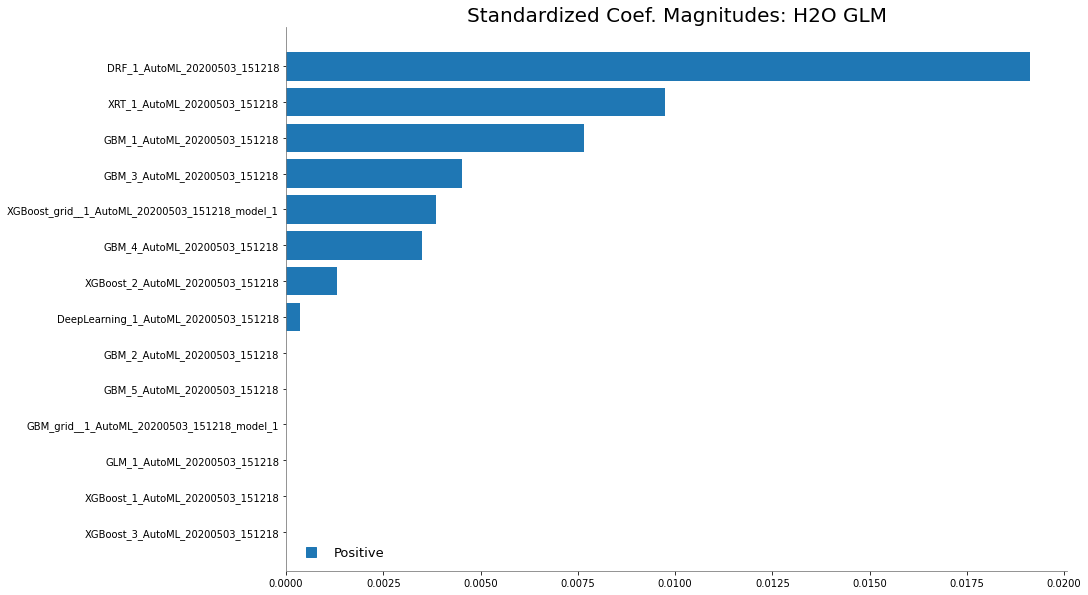

In [0]:
%matplotlib inline
metalearner.std_coef_plot()

In [0]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.0299226
0.0103293
0.0101996
0.00520546
0.00520696
0.00474087
0.00520692
0.00520512
0.00488243
0.0725234


In [0]:
h2oFile = OutFolder + '/claims_approval_model_h2o'
h2o.save_model(aml.leader, path=h2oFile)

'/content/gdrive/My Drive/capstone-project/output_data/claims_approval_model_h2o/StackedEnsemble_AllModels_AutoML_20200503_151218'

In [0]:
is_xgboost_available = H2OXGBoostEstimator.available()
print(is_xgboost_available)

if is_xgboost_available:
    claims_xgb = H2OXGBoostEstimator(booster='dart',
                                     normalize_type="tree",
                                     seed=1234)
    claims_xgb.train(x=x,
                     y=y,
                     training_frame=train,
                     validation_frame=test)

    # Eval performance:
    perf = claims_xgb.model_performance()

    # Generate predictions on a test set (if necessary):
    pred = claims_xgb.predict(test)

True
xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [0]:
# Adding more detailed algoritms

In [0]:
# K-flod for XGB  - cv = 10 folds
from sklearn.model_selection import cross_val_score
XGB_accuracies = cross_val_score(estimator = model_xgb, X = X_train_scaled_smot, y = ytrain_smot, cv = 10)
print("Mean_XGB_Acc : ", XGB_accuracies.mean())


Mean_XGB_Acc :  0.9285458214704807


In [0]:
#  Smote 60:40
sm = SMOTENC(random_state=42, categorical_features=[1,4,5,6,7,8,9,10], sampling_strategy=.6)
y = df_data['Label']  
X_smot,y_smot = sm.fit_resample(X,y.ravel())
print('Original dataset samples per class {}'.format(Counter(y)))
print('Resampled dataset samples per class {}'.format(Counter(y_smot)))

Xtrain_smot, Xtest_smot, ytrain_smot, ytest_smot = train_test_split(X_smot, y_smot, test_size=0.2,random_state = 88)

std_scale = StandardScaler()
X_train_scaled_smot = std_scale.fit_transform(Xtrain_smot)
X_test_scaled_smot = std_scale.transform(Xtest_smot)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset samples per class Counter({0: 296370, 1: 1971})
Resampled dataset samples per class Counter({0: 296370, 1: 177822})


In [0]:
# Helper Functions

def baseline_models(X_train, X_test, y_train, y_test, cols, verbose=False):
    #List of models to be used
    models=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs'),
            RandomForestClassifier(),GradientBoostingClassifier(),
            CatBoostClassifier(iterations=500), XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)]
    
    #Instantiate lists to store each of the models results
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    #Run thorugh each of the models to get their performance metrics
    for ind, model in enumerate(models):
        clf = model
        clf.fit(X_train, y_train)
        test_preds = clf.predict(X_test)
        f1.append(f1_score(y_test, test_preds))
        accuracy.append(accuracy_score(y_test, test_preds))
        auc.append(roc_auc_score(y_test, test_preds))
        recall.append(recall_score(y_test, test_preds))
        precision.append(precision_score(y_test, test_preds))
        #Print the model and its report
        if verbose:
            print('Classification Model: ',model,'\n')
            print(classification_report(y_test, test_preds),'\n')
            if ind != 1:
                plot_feat_importance(clf, cols)
    #store results in dataframe
    results = pd.DataFrame([f1,auc, accuracy, precision,recall],
                      index= ['f1','roc_auc','accuracy','precision','recall',],
                           columns=['DecisionTree','LogisticRegression','RandomForest','Gradient Boosting', 
                                    'CatBoostClassifier', 'XGBClassifier'])
    #Change orientation of the dataframe
    return results.transpose()

def plot_feat_importance(clf,index):
    '''Plot the 0 most important features for a classifier model in a bar chart
    according to importance'''
    feat_importances = pd.DataFrame(clf.feature_importances_, index=index, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True).tail(10)
    feat_importances.plot(kind='barh', title='Top 10 Important Features',legend=False)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show();
    
def heatmap(data,figsize=(8,8), annot=False):
    #plot heatmap to find multicollinearity
    plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(data.corr(),vmin=-0.75,vmax=0.75,center=0, cmap=cmap,annot=annot);

def grid_pipe(X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, cols, pipedict, hyperdict, scoring='accuracy', display=True):
    model_scores=[]
    fitted_models={}
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(X_train_transformed, y_train_transformed)
        end = time.time()
        #Append socres and time
        model_scores.append((name,model.best_score_,end-start))
        #Append model
        fitted_models[name]=model
        test_preds = model.predict(X_test_transformed)
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            print('Classification Model: ',model,'\n')
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')  
            print(classification_report(y_test_transformed, test_preds),'\n')
            #if name != 'logisticregression':
            #    plot_feat_importance(model, cols)
       
        f1.append(f1_score(ytest_smot, test_preds))
        accuracy.append(accuracy_score(ytest_smot, test_preds))
        auc.append(roc_auc_score(ytest_smot, test_preds))
        recall.append(recall_score(ytest_smot, test_preds))
        precision.append(precision_score(ytest_smot, test_preds))
    
    #store results in dataframe
    results = pd.DataFrame([f1,auc, accuracy, precision,recall],
                        index= ['f1','roc_auc','accuracy','precision','recall',],
                        columns=['DecisionTree','LogisticRegression','RandomForest','Gradient Boosting', 
                                 'CatBoostClassifier', 'XGBClassifier'])
    

    return model_scores, fitted_models,  results.transpose()

Classification Model:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59275
           1       0.50      0.41      0.45       394

    accuracy                           0.99     59669
   macro avg       0.75      0.70      0.72     59669
weighted avg       0.99      0.99      0.99     59669
 



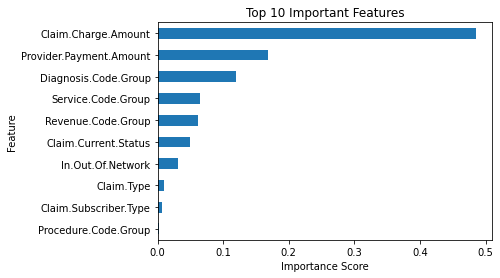

Classification Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59275
           1       0.48      0.08      0.14       394

    accuracy                           0.99     59669
   macro avg       0.74      0.54      0.57     59669
weighted avg       0.99      0.99      0.99     59669
 

Classification Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
         

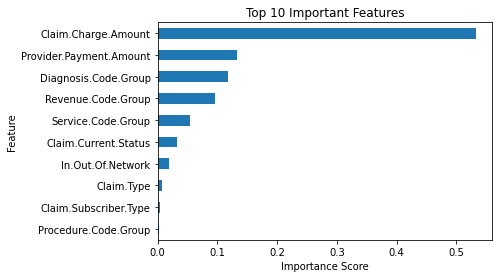

Classification Model:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59275
           1       0.58      0.12      0.20       394

    accuracy                           0.99     59669
   macro avg       0.79      0.56      0.60     59669
weight

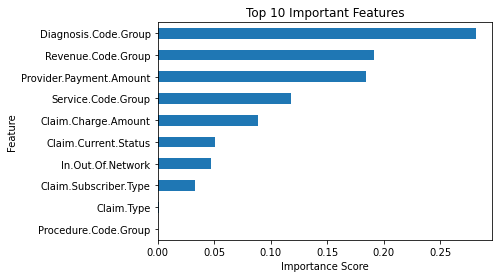

Learning rate set to 0.201511
0:	learn: 0.2543470	total: 148ms	remaining: 1m 13s
1:	learn: 0.1096700	total: 232ms	remaining: 57.7s
2:	learn: 0.0663356	total: 307ms	remaining: 50.9s
3:	learn: 0.0405492	total: 398ms	remaining: 49.3s
4:	learn: 0.0304591	total: 486ms	remaining: 48.1s
5:	learn: 0.0263359	total: 573ms	remaining: 47.2s
6:	learn: 0.0238906	total: 660ms	remaining: 46.5s
7:	learn: 0.0225536	total: 757ms	remaining: 46.6s
8:	learn: 0.0216114	total: 844ms	remaining: 46.1s
9:	learn: 0.0209751	total: 932ms	remaining: 45.6s
10:	learn: 0.0206088	total: 1.02s	remaining: 45.3s
11:	learn: 0.0203317	total: 1.12s	remaining: 45.7s
12:	learn: 0.0201143	total: 1.21s	remaining: 45.4s
13:	learn: 0.0199702	total: 1.3s	remaining: 45.1s
14:	learn: 0.0198153	total: 1.39s	remaining: 44.9s
15:	learn: 0.0196645	total: 1.47s	remaining: 44.6s
16:	learn: 0.0195488	total: 1.56s	remaining: 44.4s
17:	learn: 0.0194071	total: 1.65s	remaining: 44.2s
18:	learn: 0.0193486	total: 1.74s	remaining: 44.1s
19:	learn: 

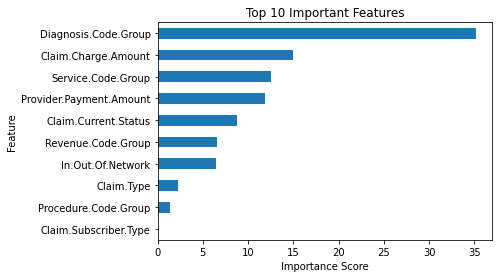

Classification Model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59275
           1       0.64      0.06      0.11       394

    accuracy                           0.99     59669
   macro avg       0.82      0.53      0.55     59669
weighted avg       0.99      0.99      0.99     59669
 



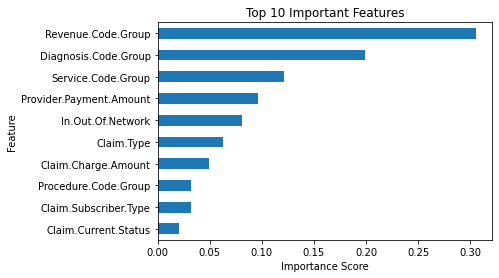

In [0]:
results = baseline_models(X_train_scaled, X_test_scaled, ytrain, ytest, X.columns, verbose=True)

In [0]:
#Display the results of the models as a dataframe
#Sort models according to f1 score.
results.sort_values('f1',ascending=False)

,f1,roc_auc,accuracy,precision,recall
RandomForest,0.450549,0.706688,0.993296,0.491018,0.416244
DecisionTree,0.446927,0.701679,0.993363,0.496894,0.406091
CatBoostClassifier,0.403974,0.654080,0.993967,0.580952,0.309645
Gradient Boosting,0.197895,0.559358,0.993615,0.580247,0.119289
LogisticRegression,0.139130,0.540322,0.993363,0.484848,0.081218
XGBClassifier,0.106977,0.529078,0.993564,0.638889,0.058376


In [0]:
print('Best Model per Metric')
for metric in results.columns:
    print(f'{metric.capitalize()}:',results.sort_values(metric,ascending=False).index[0])

Best Model per Metric
F1: RandomForest
Roc_auc: RandomForest
Accuracy: CatBoostClassifier
Precision: XGBClassifier
Recall: RandomForest


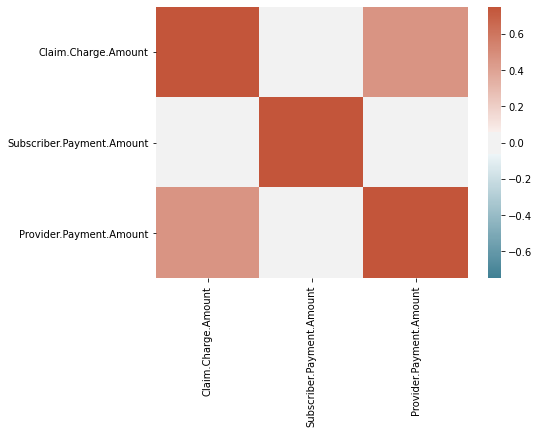

In [0]:
heatmap(X, figsize=(7, 5))

In [0]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression': Pipeline([('clf', LogisticRegression(random_state=123, solver='lbfgs'))]),
            'decisiontree':Pipeline([('clf', DecisionTreeClassifier(random_state=123))]),
            'randomforest':Pipeline([('clf', RandomForestClassifier(random_state=123))]),
            'gradientboosting': Pipeline([('clf', GradientBoostingClassifier(random_state=123))]),
            'catboosting':Pipeline([('clf', CatBoostClassifier(random_state=123))]),
            'XGboosting': Pipeline([('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05,random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr ={'clf__C': [0.01,0.1,1]}

hyperparameters_dt ={'clf__criterion': ['entropy', 'gini'], 
                     'clf__max_depth': [4, 5, 6],  
                     'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
                     'clf__min_samples_split':[0.05 ,0.1, 0.2]}

hyperparameters_rf ={'clf__n_estimators': [100,150],
                     'clf__criterion': ['entropy', 'gini'], 
                     'clf__max_depth': [4, 5, 6],  
                     'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
                     'clf__min_samples_split':[0.05 ,0.1, 0.2]}

hyperparameters_gb ={'clf__n_estimators': [100,150], 
                     'clf__max_depth': [1, 3, 5],  
                     'clf__learning_rate': [0.05,0.1]}

hyperparameters_cb ={'clf__l2_leaf_reg': [1, 3, 5, 7, 9], 
                     'clf__depth': [3, 5, 7],  
                     'clf__learning_rate': [0.05,0.1]}                                  
                                    
hyperparameters_xg ={'clf__n_estimators': [100,150], 
                     'clf__max_depth': [3, 5, 7],  
                     'clf__learning_rate': [0.05,0.1]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression':hyperparameters_lr ,
                   'decisiontree':hyperparameters_dt,
                   'randomforest':hyperparameters_rf,
                   'gradientboosting': hyperparameters_gb,
                   'catboosting':hyperparameters_cb,
                   'XGboosting': hyperparameters_xg
                  }

In [0]:
model_scores_f1, fitted_models_f1, results_f1 = grid_pipe(Xtrain_smot, Xtest_smot, ytrain_smot, ytest_smot, X.columns, pipelines, hyperparameters, scoring='f1')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The logisticregression model has been fitted.
Classification Model:  GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                          

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.1min finished


The decisiontree model has been fitted.
Classification Model:  GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                              

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 92.4min finished


The randomforest model has been fitted.
Classification Model:  GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.0min


In [0]:
score_times_df_auc = pd.DataFrame(model_scores_f1,
                              columns=['classifier','f1_score',
                                       'time']).set_index('classifier').sort_values('time')
score_times_df_auc

NameError: ignored

In [0]:
#Display the results of the models as a dataframe
#Sort models according to f1 score.
results_f1.sort_values('f1',ascending=False)

In [0]:
print('Best Model per Metrics')
for metric in results_f1.columns:
    print(f'{metric.capitalize()}:',results_f1.sort_values(metric,ascending=False).index[0])